In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, datasets,regularizers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = datasets.fashion_mnist

In [ ]:
(x_train,y_train), (x_test,y_test) = data.load_data()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(128,activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Check training accuracy
        if logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(x_train,y_train,epochs=50,batch_size=30,validation_data=(x_test, y_test),callbacks=[callbacks])

Epoch 1/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7802 - loss: 0.6274 - val_accuracy: 0.8381 - val_loss: 0.4548
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8613 - loss: 0.3879 - val_accuracy: 0.8641 - val_loss: 0.3767
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8791 - loss: 0.3305 - val_accuracy: 0.8634 - val_loss: 0.3767
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8863 - loss: 0.3093 - val_accuracy: 0.8721 - val_loss: 0.3483
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8894 - loss: 0.2983 - val_accuracy: 0.8703 - val_loss: 0.3654
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8943 - loss: 0.2809 - val_accuracy: 0.8794 - val_loss: 0.3463
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9013 - loss: 0.2651 - val_accuracy: 0.8785 - val_loss: 0.3474
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9054 - loss: 0.2528

In [ ]:
model.evaluate(x_test,y_test,batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8857 - loss: 0.4512


[0.4424995481967926, 0.8849999904632568]

In [ ]:
classifications = model.predict(x_test)
print(np.argmax(classifications[0]))
print(y_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
9
9


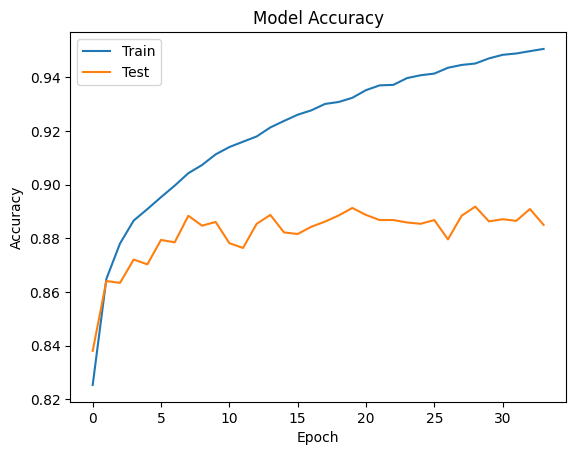

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

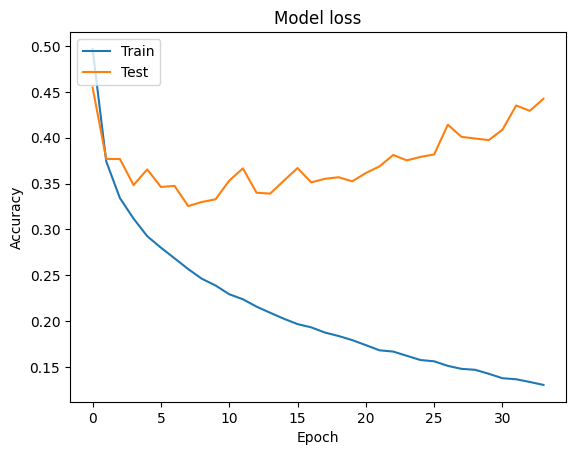

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()